In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image, ImageDraw
from IPython.display import display
from time import time

C:\Users\Brock\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def scale_image(pil_image, scale_factor_width, scale_factor_height, resample_filter=Image.LANCZOS):
    """
    Scales a PIL image by specified factors for width and height.

    Args:
        pil_image (PIL.Image.Image): The input PIL Image object.
        scale_factor_width (float): The scaling factor for the width.
                                     0.5 for half, 2.0 for double, etc.
        scale_factor_height (float): The scaling factor for the height.
                                      0.5 for half, 2.0 for double, etc.
        resample_filter (PIL.Image.Resampling): The resampling filter to use.
                                                Defaults to Image.LANCZOS.

    Returns:
        PIL.Image.Image: The scaled image.
    """
    if not isinstance(pil_image, Image.Image):
        raise TypeError("Input must be a PIL Image object.")

    # Get the original dimensions
    original_width, original_height = pil_image.size

    # Calculate the new dimensions
    new_width = round(original_width * scale_factor_width)
    new_height = round(original_height * scale_factor_height)

    # Ensure dimensions are at least 1 pixel to avoid errors
    new_width = max(1, new_width)
    new_height = max(1, new_height)

    # Resize the image
    scaled_img = pil_image.resize((new_width, new_height), resample=resample_filter)

    return scaled_img

In [3]:


model = AutoModelForCausalLM.from_pretrained(
    "vikhyatk/moondream2",
    revision="2025-04-14",
    trust_remote_code=True,
    device_map={"": "cuda"}
)

In [4]:
model.compile()

In [5]:
def point(thing_to_find, color = (0, 255, 0)):
    # Pointing
    print(f"\nPointing: '{thing_to_find}'")
    start_time = time()
    points = model.point(original_image, thing_to_find)["points"]
    end_time = time()
    time_taken = end_time - start_time
    print("Seconds taken:", round(time_taken, 2))
    image = original_image.copy()
    print(f"Found {len(points)} {thing_to_find}(s)")
    
    # create a copy of the image
    
    # draw the points on the image
    for point in points:
        # point.x and point.y are normalized between 0 and 1, so we need to convert them to the image size
        x = int(point['x'] * image.width)
        y = int(point['y'] * image.height)
        # Draw a large green circle at the point
        draw = ImageDraw.Draw(image)
        draw.ellipse((x-10, y-10, x+10, y+10), fill=(color), outline=color)
    
    # show the image
    display(image)


In [78]:
image = Image.open("C:\\Users\\Brock\\Documents\\code\\omnibot_2000\\test_image_2.png")
scale_factor = 0.5
image = scale_image(image, scale_factor, scale_factor)

original_image = image.copy()


# # Captioning
# print("Short caption:")
# print(model.caption(image, length="short")["caption"])

# print("\nNormal caption:")
# for t in model.caption(image, length="normal", stream=True)["caption"]:
#     # Streaming generation example, supported for caption() and detect()
#     print(t, end="", flush=True)
# print(model.caption(image, length="normal"))

# # Visual Querying
# print("\nVisual query: 'How many people are in the image?'")
# print(model.query(image, "How many people are in the image?")["answer"])

# # Object Detection
# print("\nObject detection: 'face'")
# objects = model.detect(image, "face")["objects"]
# print(f"Found {len(objects)} face(s)")


Pointing: 'face'
Seconds taken: 1.61
Found 5 face(s)


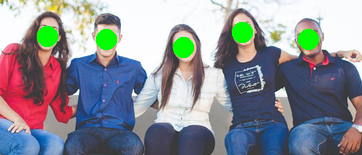

In [79]:
point("face")


Pointing: 'glasses'
Seconds taken: 1.01
Found 0 glasses(s)


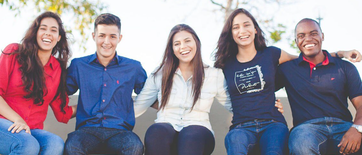

In [80]:
point("glasses")


Pointing: 'coffee'
Seconds taken: 1.21
Found 0 coffee(s)


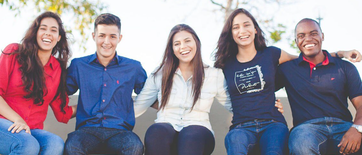

In [81]:
point("coffee")


Pointing: 'object'
Seconds taken: 1.01
Found 0 object(s)


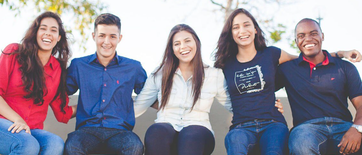

In [82]:
point("object")


Pointing: 'hand'
Seconds taken: 1.47
Found 4 hand(s)


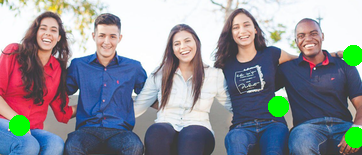

In [84]:
point("hand")


Pointing: 'shirt'
Seconds taken: 1.45
Found 5 shirt(s)


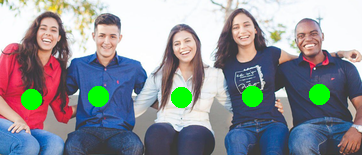

In [85]:
point("shirt")


Pointing: 'cat'
Seconds taken: 1.03
Found 0 cat(s)


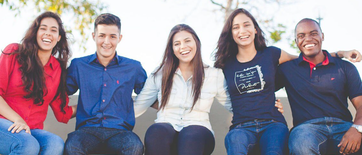

In [86]:
point("cat")


Pointing: 'a way to say hello with your hand'
Seconds taken: 1.1
Found 1 a way to say hello with your hand(s)


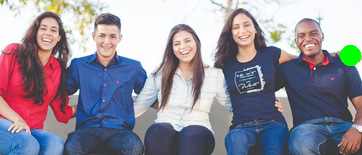

In [89]:
point("a way to say hello with your hand")


Pointing: 'woman'
Seconds taken: 1.22
Found 3 woman(s)


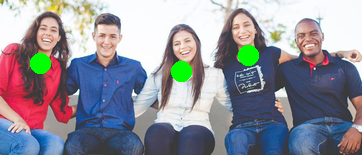

In [90]:
point("woman")


Pointing: 'man'
Seconds taken: 1.17
Found 2 man(s)


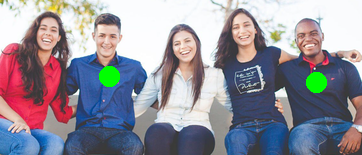

In [94]:
point("man")


Pointing: 'bald man'
Seconds taken: 1.3
Found 1 bald man(s)


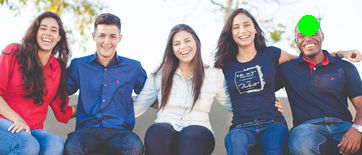

In [100]:
point("bald man")